In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.express as px
from IPython.display import display, Markdown
import plotly.express as px
import matplotlib.gridspec as gridspec
import folium
from IPython import display
import geopandas as gpd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import random
from sklearn.model_selection import train_test_split

In [22]:
veri = pd.read_csv("co2_emis.csv")
dfnew = pd.read_csv("2.CO2_emission.csv")
veri2= pd.read_csv("co2_emis.csv")
dfdene=pd.read_csv("2.CO2_emission.csv")

In [4]:
df2=veri2.melt(id_vars=['Country Name'], var_name='Year').sort_values(by=['Year'])
df2 = df2.fillna(df2.mean())
df2 = df2.rename(columns={'value': 'co2emission'})

In [5]:
dfe=df2
dfnew = dfnew[["Country Name"] + [str(i) for i in range(1990, 2020)]]

# Rename the columns
dfnew = dfnew.rename(columns={"Country Name": "Country Name"})
dfnew.columns = ["Country Name"] + [str(i) for i in range(1990, 2020)]

# Melt the dataframe so that each year becomes a separate row
dfnew = pd.melt(dfnew, id_vars=["Country Name"], var_name="Year", value_name="co2emission")

# Load the second dataframe


# Convert the Year column to a string
dfe["Year"] = dfe["Year"].astype(str)

# Merge the two dataframes
result = pd.merge(dfnew, dfe, on=["Country Name", "Year"])

In [6]:
dfnew = dfnew.fillna(dfnew.mean())

In [7]:
veri1= pd.read_csv("co2_emis.csv")

input_dir = 'co2_emis.csv'
veri = pd.read_csv(input_dir,index_col='Country Name')

veri = veri.transpose()
veri.index = pd.to_datetime(veri.index).year               #Data Cleaning
veri.dropna(axis=1 , inplace = True)
veri.dropna(axis=1 , inplace = True)
veri.head()

Country Name  Africa Eastern and Southern  Afghanistan  \
1960                             0.906060     0.046057   
1961                             0.922474     0.053589   
1962                             0.930816     0.073721   
1963                             0.940570     0.074161   
1964                             0.996033     0.086174   

Country Name  Africa Western and Central    Angola   Albania  Arab World  \
1960                            0.090880  0.100835  1.258195    0.609268   
1961                            0.095283  0.082204  1.374186    0.662618   
1962                            0.096612  0.210533  1.439956    0.727117   
1963                            0.112376  0.202739  1.181681    0.853116   
1964                            0.133258  0.213562  1.111742    0.972381   

Country Name  United Arab Emirates  Argentina  Antigua and Barbuda  Australia  \
1960                      0.119037   2.383343             0.677418   8.582937   
1961                      0.109136   2.458551             0.866667   8.641569   
1962                      0.163542   2.538447             1.838457   8.835688   
1963                      0.175833   2.330685             1.487469   9.226440   
1964                      0.132815   2.553442             1.590448   9.759073   

Country Name  ...  Upper middle income   Uruguay  United States  \
1960          ...             2.573291  1.701585      15.999779   
1961          ...             2.408432  1.602728      15.681256   
1962          ...             2.370116  1.540660      16.013937   
1963          ...             2.435563  1.639287      16.482762   
1964          ...             2.523331  1.710104      16.968119   

Country Name  St. Vincent and the Grenadines  Venezuela, RB   Vietnam  \
1960                                0.135865       7.009414  0.181947   
1961                                0.133884       6.153191  0.183099   
1962                                0.132162       6.188716  0.217694   
1963                                0.174204       6.208593  0.196997   
1964                                0.215409       6.041541  0.209870   

Country Name     World     Samoa  Yemen, Rep.  South Africa  
1960          3.121158  0.135031     0.011038      5.727223  
1961          3.068090  0.163542     0.013599      5.832621  
1962          3.114839  0.158377     0.012729      5.887168  
1963          3.221195  0.184037     0.014518      5.961337  
1964          3.324046  0.208106     0.017550      6.332343  

[5 rows x 191 columns]

In [8]:
styles = [dict(selector="caption", props=[("font-size", "120%"),
                                          ("font-weight", "bold"),("background-color", "cyan"),("color","black"),("text-align","center")])]
# displaying the DataFrame holiday_event
display.display(veri.head(10).style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()                                  
.set_caption('dataset & summary').set_table_styles(styles))
veri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 1960 to 2018
Columns: 191 entries, Africa Eastern and Southern to South Africa
dtypes: float64(191)
memory usage: 88.5 KB


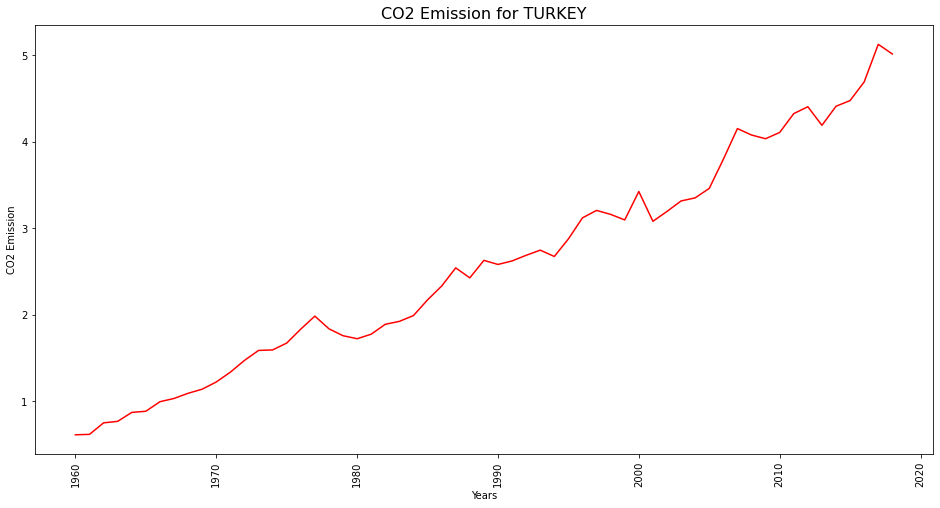

In [9]:
plt.figure(figsize=(13,7))
ax=plt.axes()
ax.set_facecolor('white')
sns.lineplot(x=veri.index,y=veri['Turkey'],color='red',)
plt.xticks(rotation='vertical')
plt.xlabel('Years')
plt.ylabel('CO2 Emission')
plt.title("CO2 Emission for TURKEY",fontsize=16)
plt.tight_layout(pad=0.5)
plt.show()

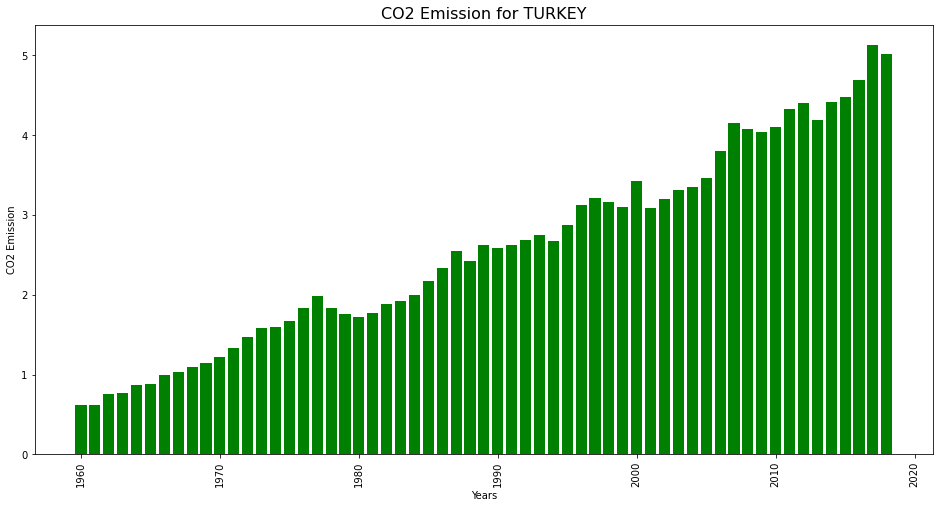

In [10]:
plt.figure(figsize=(13,7))
ax = plt.axes()
ax.set_facecolor('white')

# Create a bar chart using the bar function
plt.bar(veri.index, veri['Turkey'], color='green')

plt.xticks(rotation='vertical')
plt.xlabel('Years')
plt.ylabel('CO2 Emission')
plt.title("CO2 Emission for TURKEY", fontsize=16)
plt.tight_layout(pad=0.5)
plt.show()

In [11]:
line = px.line(data_frame= veri, x = veri.index,y =["World"] , markers = True)
line.update_yaxes(title_text = 'Metric tons of CO2 emissions per capita')
line.update_xaxes(title_text = 'Year',rangeslider_visible = False)
line.update_layout(legend=dict(title="Country"),showlegend = True,
    title = {
        'text': ' World Wide CO2 Emissions',
        'y':0.83,
        'x':0.65,
            },),
line.show()

In [12]:
# Calculate Overall Mean
veri_ort = veri.describe()
veri_ort['OverallMean'] = veri_ort.mean(axis=1)
OverallMean = round(veri_ort.at['mean','OverallMean'],2)
print('{} - Overall Mean'.format(round(OverallMean,2)))

4.03 - Overall Mean


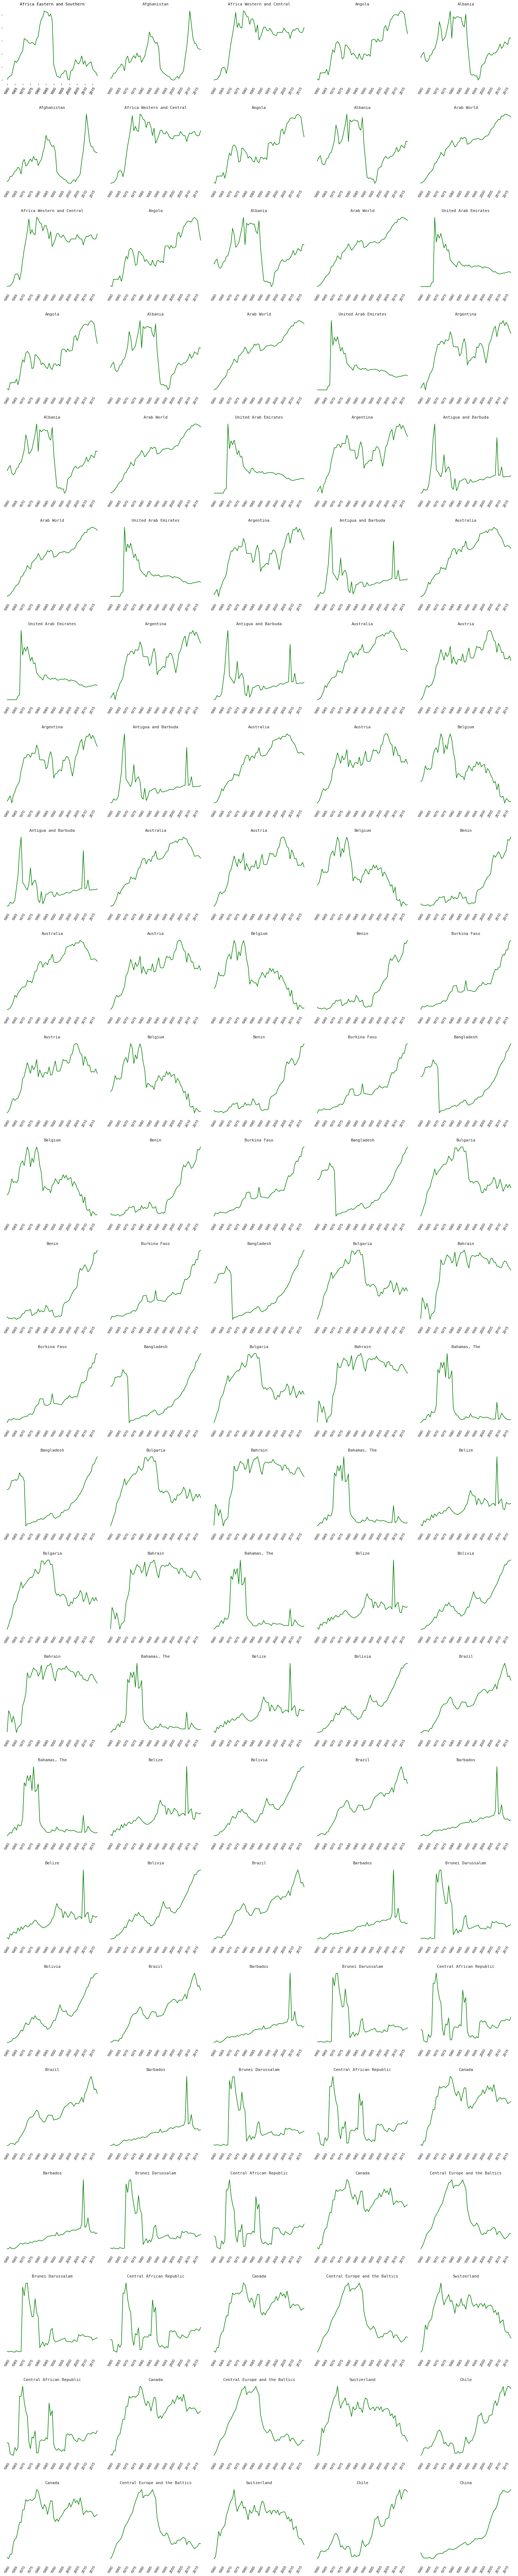

In [13]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize = (20, 99))
spec = gridspec.GridSpec(ncols=5, nrows=25, figure=fig)

countries = veri.columns.tolist()[:125]
for i in range(5):
    for j in range(25):
        ax = fig.add_subplot(spec[j,i])
        sns.set_style("white")
        plt.title(countries[i+j], size = 11, fontname = 'monospace')
        ax.plot(veri[countries[i+j]].index, veri[countries[i+j]].values, color='green')
        ax.set_xticklabels(veri[countries[i+j]].index[::5], rotation=60)
        ax.set_xticks(veri[countries[i+j]].index[::5])
        ax.set_yticklabels([])
        for s in ['top', 'right', 'bottom', 'left']:
            ax.spines[s].set_visible(False)
fig.tight_layout(h_pad = 3)
plt.show()

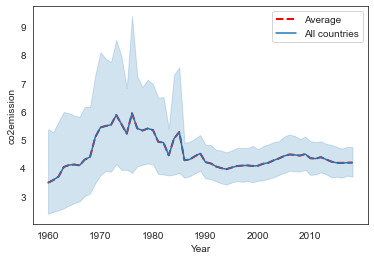

In [14]:
avg_emissions = df2.groupby('Year')['co2emission'].mean()

# Plot the average CO2 emissions
avg_emissions.plot(color='red', linewidth=2, linestyle='--', label='Average')

# Plot the CO2 emissions for all countries
sns.lineplot(x='Year', y='co2emission', data=df2, label='All countries')

# Add a legend and display the plot
plt.legend()
plt.show()

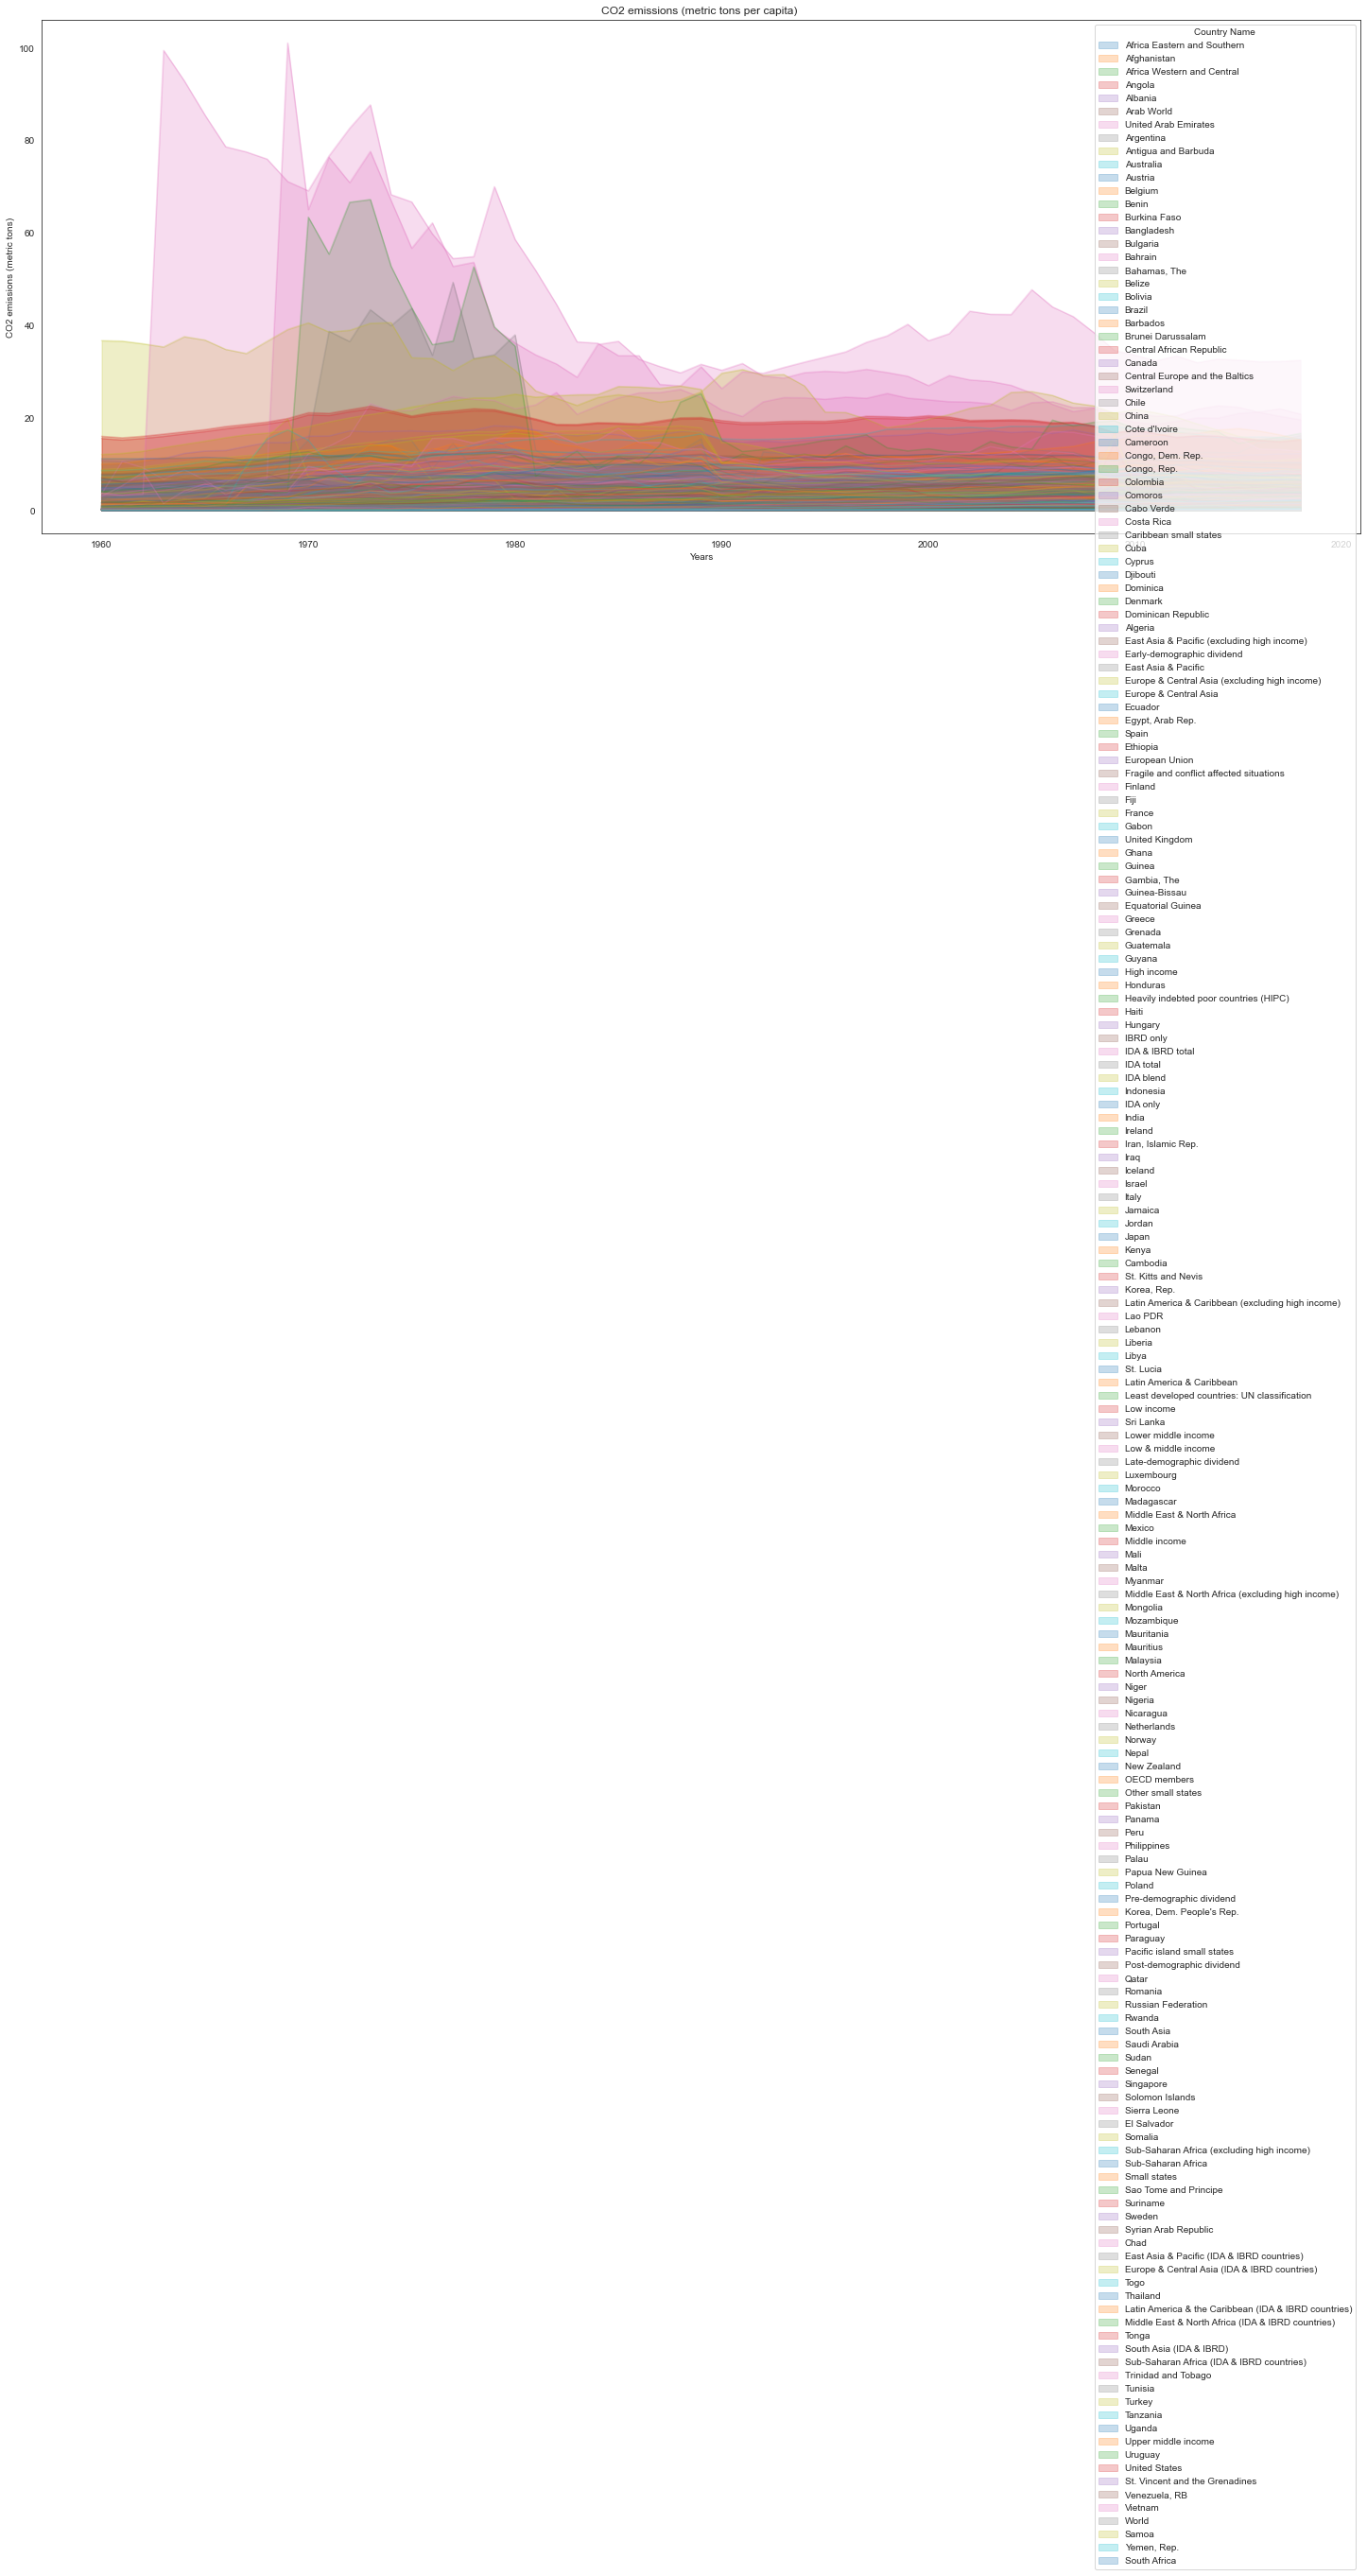

In [18]:
import matplotlib.pyplot as plt

# Enable interactive mode
plt.ion()

# Create the plot
fig, ax = plt.subplots()
veri.plot(kind='area', alpha=0.25, stacked=False, figsize=(25, 10), ax=ax)
ax.set_title('CO2 emissions (metric tons per capita) ')
ax.set_ylabel('CO2 emissions (metric tons)')
ax.set_xlabel('Years')

# Add mouse hover event to the plot
def on_hover(event):
    # Get mouse coordinates
    x, y = event.x, event.y
    # Find the nearest value on the x axis
    x_val = veri.index[(veri.index-x).abs().idxmin()]
    # Get the corresponding y value
    y_val = veri.loc[x_val]
    # Add annotation at the mouse position
    ax.annotate(f'Country: {x_val}\nCO2 emissions: {y_val:.2f}', (x, y))

fig.canvas.mpl_connect('motion_notify_event', on_hover)

# Show the plot
plt.show()


In [15]:
veri1.reset_index(level=0, inplace=True)

In [16]:
df3=veri1.melt(id_vars=['Country Name'], var_name='Year').sort_values(by=['Year'])
df3 = df3.fillna(df3.mean())

In [17]:
px.choropleth(data_frame=df3[df3['Country Name']!='World'], locationmode='country names',locations='Country Name', color='value', animation_frame='Year', title='CO2 Emission by Countries by Year',color_continuous_scale=px.colors.sequential.RdBu_r, range_color=(200, 0))



In [18]:
px.choropleth(data_frame=dfnew[dfnew['Country Name']!='World'], locationmode='country names',locations='Country Name', color='co2emission', animation_frame='Year', title='CO2 Emission by Countries by Year (Second data)',color_continuous_scale=px.colors.sequential.RdBu_r, range_color=(200, 0))


df2=veri2.melt(id_vars=['Country Name'], var_name='Year').sort_values(by=['Year'])
df2 = df2.fillna(df2.mean())
df2 = df2.rename(columns={'value': 'co2emission'})

In [19]:



# Maksimum 10 değerdeki ülkeleri seçin
top_countries = df2.sort_values(by='co2emission', ascending=False).head(150)
top_countries = top_countries.drop_duplicates('Country Name')
# Create the pie chart
fig = px.pie(top_countries, values='co2emission', names='Country Name', title='Countries with the highest CO2 emissions',
            color_discrete_sequence=['#ff6666', '#ffcc99', '#99ff99', '#66b3ff', '#c2c2f0'])
fig.show()

In [20]:

# Create the box plot
fig = px.box(data_frame=top_countries, x='co2emission', y='Country Name', color='Country Name', title='Variation of Carbon emission by top 9 countries')

# Set the tickvals and ticktext for the xaxis
tickvals = list(range(0, 360, 10))
ticktext = [str(x) for x in tickvals]
fig.update_layout(xaxis=dict(tickvals=tickvals, ticktext=ticktext))

fig.show()


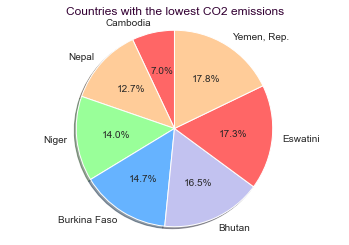

      Country Name  Year  co2emission
5177      Cambodia  1979     0.004333
444          Nepal  1961     0.007857
173          Niger  1960     0.008657
19    Burkina Faso  1960     0.009112
4288        Bhutan  1976     0.010194
490       Eswatini  1961     0.010680
262    Yemen, Rep.  1960     0.011038


In [21]:
import matplotlib.pyplot as plt
df2['co2emission'] = df2['co2emission'].replace(0, OverallMean)
df2["co2emission"] = df2["co2emission"].abs()
# Select the countries with the minimum 10 CO2 emissions
min_countries = df2.sort_values(by='co2emission', ascending=True).head(17)
min_countries = min_countries.drop_duplicates('Country Name')

# Create the pie chart
plt.pie(min_countries['co2emission'], labels=min_countries['Country Name'], autopct='%1.1f%%', 
        shadow=True, startangle=90, colors=['#ff6666', '#ffcc99', '#99ff99', '#66b3ff', '#c2c2f0'])
plt.title('Countries with the lowest CO2 emissions',color='#330033')
plt.axis('equal')
plt.show()

# Print the selected countries
print(min_countries)

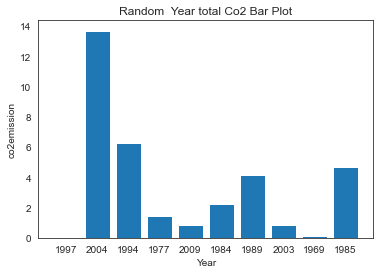

In [29]:

#here is Select a random sample of 10 rows from the dataframe
sample = df2.sample(10)

# Extract the 'value' column from the sample and use it as the y values for the bar plot
y_values = sample['co2emission']

# Extract the 'Year' column from the sample and use it as the x values for the bar plot
x_values = sample['Year']

# Create the bar plot
plt.bar(x_values, y_values)

# Add a title and axis labels
plt.title('Random  Year total Co2 Bar Plot')
plt.xlabel('Year')
plt.ylabel('co2emission')

# Display the plot
plt.show()

In [30]:
# Bağımlı ve bağımsız değişkenleri ayırın
X = df2[['Year']]
y = df2['co2emission']

# Lineer regresyon modelini oluşturun
model = LinearRegression()

# Modeli verilere uydurun (eğitin)
model.fit(X, y)

# Modeli kullanarak tahminler yapın
y_pred = model.predict(X)

In [31]:
def predict_co2emission(year: int, model: LinearRegression) -> float:
    # Make prediction using the model
    prediction = model.predict([[year]])[0]
    return prediction

In [32]:
prediction = predict_co2emission(1980, model)
print(f'Prediction for CO2 emission in 1980: {prediction}')

Prediction for CO2 emission in 1980: 4.6016274783872575


In [36]:
prediction = predict_co2emission(2030, model)
print(f'Prediction for CO2 emission in 2030: {prediction}')

Prediction for CO2 emission in 2030: 4.16595447000196


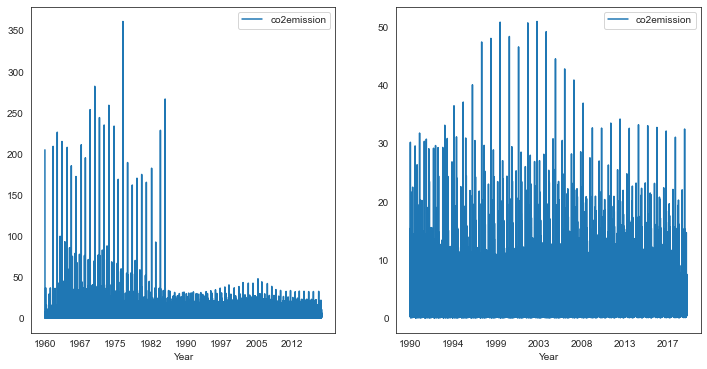

In [34]:
import matplotlib.pyplot as plt

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# plot the first dataframe in the first subplot
dfe.plot(x='Year', y='co2emission', ax=ax1)

# plot the second dataframe in the second subplot
dfnew.plot(x='Year', y='co2emission', ax=ax2)

# show the plot
plt.show()


In [27]:
dfnew.head()

Country Name country_code                     Region  \
0        Aruba          ABW  Latin America & Caribbean   
1  Afghanistan          AFG                 South Asia   
2       Angola          AGO         Sub-Saharan Africa   
3      Albania          ALB      Europe & Central Asia   
4      Andorra          AND      Europe & Central Asia   

                           Indicator Name      1990      1991      1992  \
0  CO2 emissions (metric tons per capita)       NaN       NaN       NaN   
1  CO2 emissions (metric tons per capita)  0.191745  0.167682  0.095958   
2  CO2 emissions (metric tons per capita)  0.553662  0.544539  0.543557   
3  CO2 emissions (metric tons per capita)  1.819542  1.242810  0.683700   
4  CO2 emissions (metric tons per capita)  7.521832  7.235379  6.963079   

       1993      1994      1995  ...      2011      2012      2013      2014  \
0       NaN       NaN       NaN  ...       NaN       NaN       NaN       NaN   
1  0.084721  0.075546  0.068468  ...  0.296506  0.259295  0.185624  0.146236   
2  0.708984  0.836804  0.912141  ...  0.985522  0.950696  1.036294  1.099779   
3  0.638307  0.645355  0.605436  ...  1.669423  1.503240  1.533630  1.668337   
4  6.724178  6.541579  6.733479  ...  5.850886  5.944654  5.942800  5.807128   

       2015      2016      2017      2018      2019    2019.1  
0       NaN       NaN       NaN       NaN       NaN       NaN  
1  0.172897  0.149789  0.131695  0.163295  0.159824  0.159824  
2  1.135044  1.031811  0.813301  0.777675  0.792137  0.792137  
3  1.603775  1.557664  1.788786  1.782739  1.692248  1.692248  
4  6.026182  6.080600  6.104134  6.362975  6.481217  6.481217  

[5 rows x 35 columns]